<a href="https://colab.research.google.com/github/nabilanurfathiaalhaq/Image-Classification-Using-CNN-Multiclass/blob/main/multiclass_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os,shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Pre-Processing**

In [5]:
#Code di bawah menetapkan variabel untuk jalur direktori tempat data gambar pelatihan dan validasi akan disimpan, serta subdirektori untuk setiap kategori gambar.
base_dir = '/content/drive/MyDrive/Colab Notebooks/multiclass image classification'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
bawangmerah_dir = os.path.join(base_dir,'bawang merah')
bawangputih_dir = os.path.join(base_dir, 'bawang putih')
bawangbombai_dir = os.path.join(base_dir, 'bawang bombai')

In [6]:
#Fungsi kode ini adalah untuk membuat direktori tempat menyimpan data pelatihan dan validasi untuk proyek klasifikasi gambar, dengan memastikan direktori tersebut hanya dibuat jika belum ada.
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [8]:
#Kode ini membuat variabel yang berisi jalur lengkap ke subdirektori untuk setiap jenis bawang di dalam direktori pelatihan dan validasi.
train_bawangmerah = os.path.join(train_dir, 'bawang merah')
train_bawangputih = os.path.join(train_dir, 'bawang putih')
train_bawangbombai = os.path.join(train_dir, 'bawang bombai')
val_bawangmerah = os.path.join(validation_dir, 'bawang merah')
val_bawangputih = os.path.join(validation_dir, 'bawang putih')
val_bawangbombai = os.path.join(validation_dir, 'bawang bombai')

In [9]:
#Kode ini membuat enam subdirektori untuk menyimpan gambar-gambar bawang merah, bawang putih, dan bawang bombai secara terpisah di dalam folder pelatihan dan validasi.
os.mkdir(train_bawangmerah)
os.mkdir(train_bawangputih)
os.mkdir(train_bawangbombai)
os.mkdir(val_bawangmerah)
os.mkdir(val_bawangputih)
os.mkdir(val_bawangbombai)

In [10]:
#Kode ini membagi daftar nama file gambar untuk setiap jenis bawang menjadi set pelatihan dan validasi.
train_bawangmerah_dir, val_bawangmerah_dir = train_test_split(os.listdir(bawangmerah_dir), test_size = 0.40)
train_bawangputih_dir, val_bawangputih_dir = train_test_split(os.listdir(bawangputih_dir), test_size = 0.40)
train_bawangbombai_dir, val_bawangbombai_dir = train_test_split(os.listdir(bawangbombai_dir), test_size = 0.40)

In [11]:
#Kode ini menyalin file gambar yang telah dibagi untuk pelatihan dan validasi ke dalam folder-folder yang sesuai untuk setiap jenis bawang.
for file in train_bawangmerah_dir:
  shutil.copy(os.path.join(bawangmerah_dir, file), os.path.join(train_bawangmerah, file))
for file in train_bawangputih_dir:
  shutil.copy(os.path.join(bawangputih_dir,file), os.path.join(train_bawangputih,file))
for file in val_bawangmerah_dir:
  shutil.copy(os.path.join(bawangmerah_dir, file), os.path.join(val_bawangmerah,file))
for file in val_bawangputih_dir:
  shutil.copy(os.path.join(bawangputih_dir,file), os.path.join(val_bawangputih,file))
for file in train_bawangbombai_dir:
    shutil.copy(os.path.join(bawangbombai_dir, file), os.path.join(train_bawangbombai,file))

In [13]:
#Code ini mengimpor pustaka, menghubungkan Google Drive, menyiapkan folder data gambar, membagi dan menyalin gambar, serta mengkonfigurasi generator augmentasi gambar.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    channel_shift_range=20,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    fill_mode='nearest'
)
num_classes = 3

In [14]:
#Kode ini membuat generator data pelatihan dan validasi untuk memuat gambar dari direktori yang ditentukan, mengubah ukurannya menjadi 100x100 piksel, mengelompokkannya ke dalam batch berisi 32 gambar, dan mengklasifikasikan kelas sebagai kategori.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 378 images belonging to 3 classes.
Found 168 images belonging to 3 classes.


# **Modelling and Evaluation**

In [19]:
#Kode ini mendefinisikan, menampilkan ringkasan, dan mengkompilasi model Convolutional Neural Network (CNN) untuk klasifikasi gambar.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (100,100,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  # Change the last dense layer to have 'num_classes' (which is 3) neurons
  tf.keras.layers.Dense(num_classes, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,899 (25.36 MB)

 Trainable params: 6,648,899 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Kode ini membuat fungsi yang akan menghentikan pelatihan model jika akurasi mencapai lebih dari 97%.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi melewati 97%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [21]:
#Kode ini melatih model neural network menggunakan data gambar pelatihan dan validasi dengan pengaturan epoch, langkah per epoch, dan callback untuk menghentikan pelatihan jika akurasi tinggi tercapai.
history = model.fit(
    train_generator,
    steps_per_epoch = 12, # 378 images = batch_size (32) * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 6, # 168 images = batch_size (32) * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 - 36s - 3s/step - accuracy: 0.3095 - loss: 1.2190 - val_accuracy: 0.5000 - val_loss: 1.0046
Epoch 2/20
12/12 - 34s - 3s/step - accuracy: 0.5079 - loss: 0.9610 - val_accuracy: 0.4226 - val_loss: 1.1036
Epoch 3/20
12/12 - 25s - 2s/step - accuracy: 0.6614 - loss: 0.7645 - val_accuracy: 0.5417 - val_loss: 1.1176
Epoch 4/20
12/12 - 28s - 2s/step - accuracy: 0.7302 - loss: 0.6392 - val_accuracy: 0.8571 - val_loss: 0.5107
Epoch 5/20
12/12 - 29s - 2s/step - accuracy: 0.8016 - loss: 0.4452 - val_accuracy: 0.8512 - val_loss: 0.3847
Epoch 6/20
12/12 - 42s - 3s/step - accuracy: 0.8466 - loss: 0.3982 - val_accuracy: 0.9048 - val_loss: 0.2542
Epoch 7/20
12/12 - 29s - 2s/step - accuracy: 0.8201 - loss: 0.4270 - val_accuracy: 0.7202 - val_loss: 0.6061
Epoch 8/20
12/12 - 29s - 2s/step - accuracy: 0.7831 - loss: 0.5048 - val_accuracy: 0.8750 - val_loss: 0.4174
Epoch 9/20
12/12 - 29s - 2s/step - accuracy: 0.8333 - loss: 0.4192 - val_accuracy: 0.9762 - val_loss: 0.1599
Epoch 10/20
12/12 - 29s - 2s/s

In [24]:
#Kode ini menghitung rata-rata akurasi validasi dari riwayat pelatihan model.
np.mean(history.history['val_accuracy'])

np.float64(0.859523805975914)

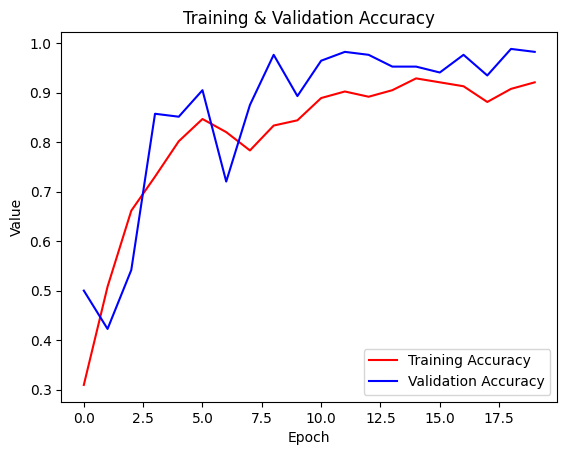

In [25]:
# Plot train & validation accuracy
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

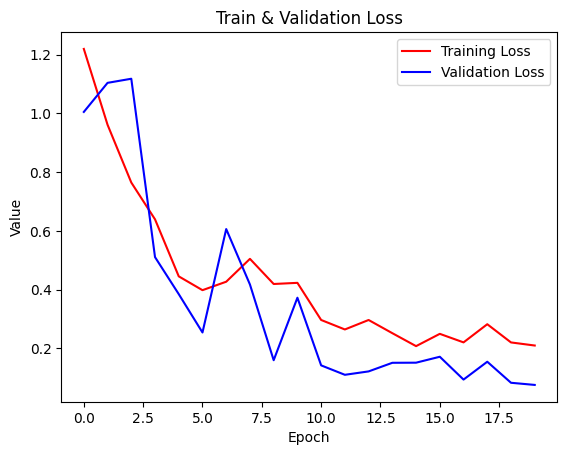

In [26]:
# Plot train & validation loss
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Train & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [28]:
#Melihat history loss
print(history.history['loss'])

[1.2190101146697998, 0.9609507322311401, 0.7644821405410767, 0.6391770839691162, 0.44519278407096863, 0.39818665385246277, 0.4269535541534424, 0.5047593116760254, 0.4192071259021759, 0.42312657833099365, 0.2967846989631653, 0.26450467109680176, 0.2967143654823303, 0.2518310248851776, 0.20778506994247437, 0.24959780275821686, 0.22054147720336914, 0.2823421061038971, 0.22036369144916534, 0.20985405147075653]


# **Model Testing**

Saving test1.jpg to test1 (5).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


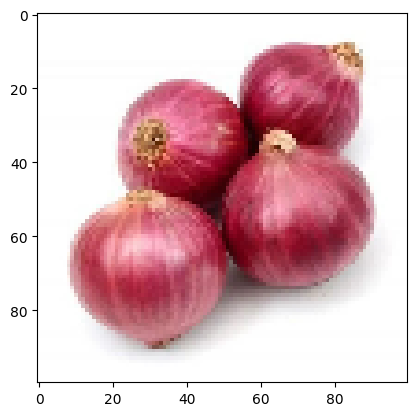

In [52]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [57]:
#Hasil Classification
print(fn)
predicted_class_index = np.argmax(classes[0])

if predicted_class_index == 0:
    print('Bawang Merah')
elif predicted_class_index == 1:
    print('Bawang Putih')
elif predicted_class_index == 2:
    print('Bawang Bombai')
else:
    print('Classification result uncertain.')

test3 (1).jpg
Bawang Merah


Saving test2.jpg to test2 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


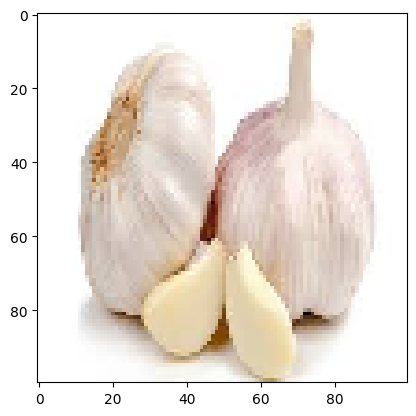

In [54]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [59]:
#Hasil Classification
print(fn)
predicted_class_index = np.argmax(classes[0])

if predicted_class_index == 0:
    print('Bawang Putih')
elif predicted_class_index == 1:
    print('Bawang Merah')
elif predicted_class_index == 2:
    print('Bawang Bombai')
else:
    print('Classification result uncertain.')

test3 (1).jpg
Bawang Putih


Saving test3.jpg to test3 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


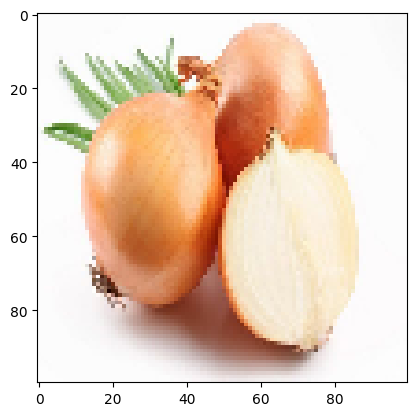

In [56]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [55]:
#Hasil Classification
print(fn)
predicted_class_index = np.argmax(classes[0])

if predicted_class_index == 0:
    print('Bawang Merah')
elif predicted_class_index == 1:
    print('Bawang Putih')
elif predicted_class_index == 2:
    print('Bawang Bombai')
else:
    print('Classification result uncertain.')

test2 (1).jpg
Bawang Bombai


In [60]:
saved_model_dir = 'save/model'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('Klasifikasi_Gambar_Multiclass.tflite', 'wb') as f:
  f.write(tflite_model)

In [61]:
model.save(f'Klasifikasi_Bawang_Merah_dan_Bawang_Putih_MobileNet.h5')